NAMA : MICHAEL WILBERT PURADISASTRA

BATCH : RMT-037

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data file
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



# Predicting Health Insurance Premium Cost

## Problem Statement
The high cost of healthcare in the United States makes health insurance a necessity for many residents. However, insurance premiums vary based on personal factors, making it hard to predict individual costs. This notebook aims to predict annual insurance premium costs for individuals based on relevant data.

### SMART Framework
- **Specific**: Predict the annual health insurance premium based on individual data.
- **Measurable**: Use historical data to estimate premiums with error metrics like MAE or RMSE.
- **Achievable**: Given the dataset and model tools, a prediction model is feasible.
- **Relevant**: Accurate premium predictions aid financial planning for health insurance.
- **Time-Bound**: Completion and validation of the model will occur within the project timeline.




## Model Selection: Regression
This problem requires predicting a continuous numerical value (insurance charges), so **Regression** is the most suitable machine learning model type.



## Business Understanding
Accurate predictions of insurance premiums help individuals budget effectively, especially given the rising healthcare costs. By understanding the key factors influencing premium costs, individuals and insurance providers can make informed decisions, potentially driving more customized insurance plans and cost management strategies.



## Problem Statement for EDA
To better understand the variables in the dataset, we will focus on:
- Age, BMI, and Smoking Status: Factors that may strongly influence premium costs.
- Number of Children: Family size could impact premium levels.
- Region: Location-specific costs could vary.

EDA will focus on analyzing these variables, their distributions, correlations, and their potential impact on premium charges.



## Data Understanding


In [2]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



## Data Cleaning
1. **Check for Missing Values**
2. **Data Type Verification**
3. **Handle Categorical Variables**.


In [4]:
# Check for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Encode categorical variables
insurance_data_encoded = pd.get_dummies(insurance_data, drop_first=True)
insurance_data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


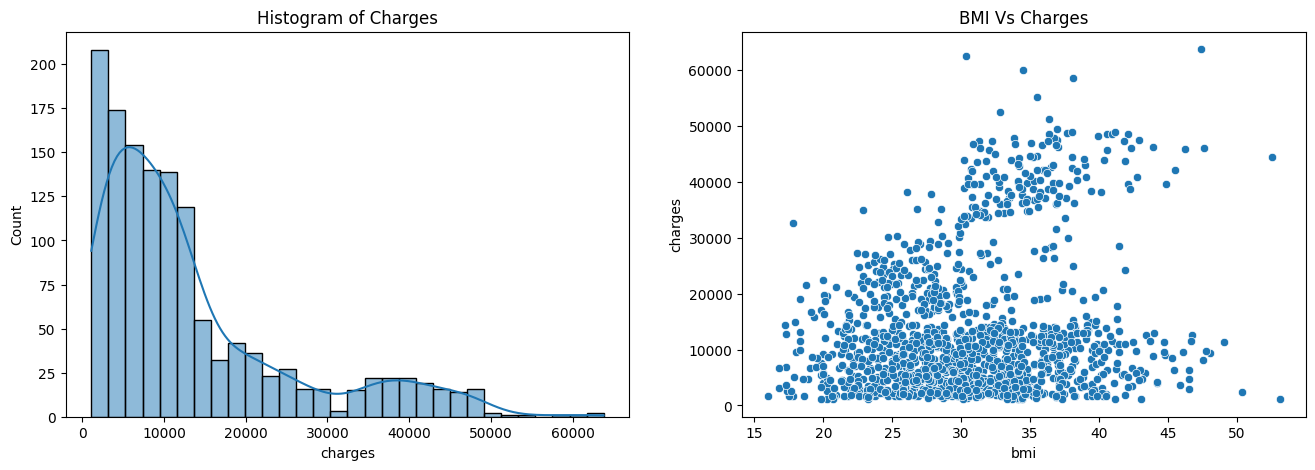

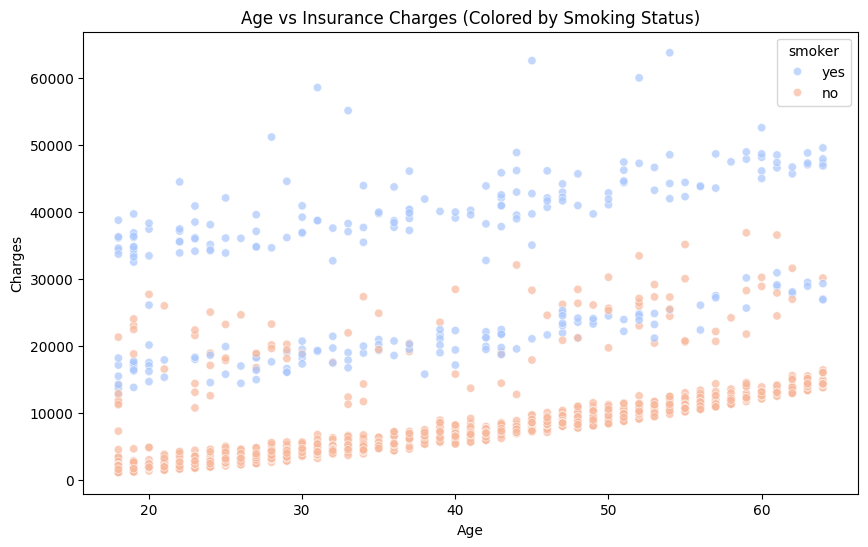

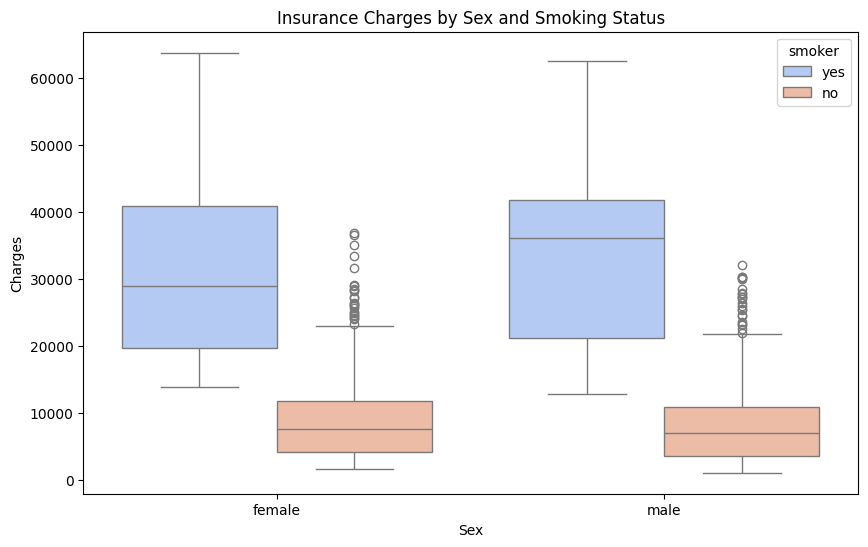

In [6]:
# Create Histogram and Scatter plot

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(insurance_data['charges'], kde = True, bins = 30)
plt.title('Histogram of Charges')

plt.subplot(1,2,2)
sns.scatterplot(x = 'bmi', y = 'charges', data= insurance_data)
plt.title('BMI Vs Charges')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_data, x='age', y='charges', hue='smoker', palette='coolwarm', alpha=0.7)
plt.title("Age vs Insurance Charges (Colored by Smoking Status)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance_data, x='sex', y='charges', hue='smoker', palette='coolwarm')
plt.title("Insurance Charges by Sex and Smoking Status")
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.show()


## Statement
1. **Histogram of Charges**

Observation: The distribution of insurance charges is heavily right-skewed. Most individuals are paying lower insurance charges, with a significant drop in the count as charges increase.
Insight: The skewed distribution suggests that higher charges are less common, likely concentrated among certain groups (e.g., smokers, older individuals, or those with higher BMIs).

2. **BMI vs. Charges Scatter Plot**

Observation: There appears to be a positive trend between BMI and charges, indicating that individuals with higher BMIs tend to have higher insurance charges.
Insight: While there is an upward trend, the relationship isn’t strictly linear, as there’s a lot of variation in charges across similar BMI values. This could imply that other factors, like smoking status and age, play a role in determining charges even at the same BMI levels.

3. **Age vs. Charges Scatter Plot (Colored by Smoking Status)**

Observation: Smokers (blue points) tend to have much higher insurance charges than non-smokers (orange points) at all age levels. Additionally, charges generally increase with age for both smokers and non-smokers, although smokers consistently incur higher charges.
Insight: Age and smoking are both influential factors for charges, with smokers facing a substantial surcharge. This suggests that the model should incorporate both variables as key predictors, as they strongly impact insurance costs.

4. **Insurance Charges by Sex and Smoking Status Box Plot**

Observation: Smokers (blue boxes) have significantly higher charges than non-smokers (orange boxes) across both sexes. While there is some variation between males and females, the difference in charges between smokers and non-smokers is much more prominent.
Insight: Smoking is a primary driver of insurance charges, and while sex does cause some variability, it is not as significant. This box plot reinforces the observation that smokers bear much higher insurance costs, irrespective of gender.

**Summary**
The analysis of these plots reveals that:

***Smoking*** and ***age*** are major factors contributing to higher insurance charges.
Higher ***BMI*** is associated with increased charges, although other factors introduce variability.
***Sex*** has a minor influence on charges compared to smoking status and age.

In conclusion, a predictive model should focus on ***age, smoker, and BMI*** as primary variables for estimating insurance charges.

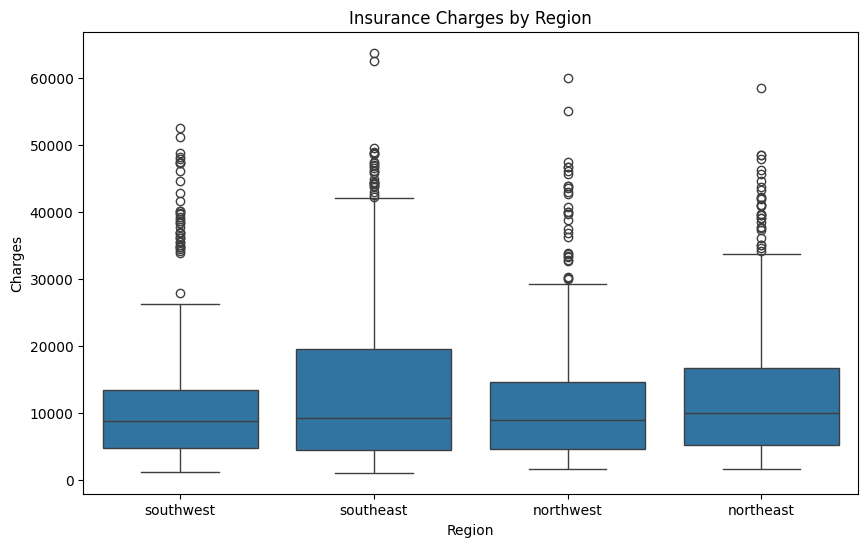

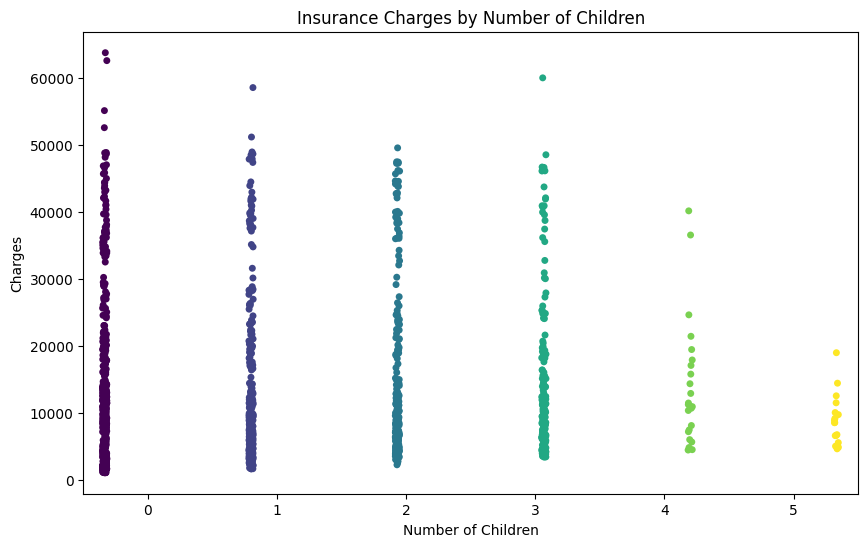

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance_data, x='region', y='charges')
plt.title("Insurance Charges by Region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(data=insurance_data, x='children', y='charges', hue='children', palette="viridis", dodge=True, legend=False)
plt.title("Insurance Charges by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Charges")
plt.show()


There may be slight regional effects on charges, with the Southeast showing slightly higher variability, but overall, region does not appear to be a major driver of insurance costs. This factor shows minimal impact on charges, as there is no consistent trend across categories. This suggests that the number of children is not a significant predictor of insurance premiums. These insights indicate that region and number of children may have minimal influence on insurance charges compared to other variables like age, BMI, and smoking status.